In [1]:
import s3
import pandas as pd

/home/chino/miniconda3/lib/python3.8/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
s3_pattern = 's3://markup-investigations-google/searches/google/iPhone-X/20*/*/*/*/html/webpage_raw.html'

In [3]:
files = s3.ls(s3_pattern)

In [4]:
len(files)

72894

In [12]:
4800 / 812

5.911330049261084

In [5]:
fn = files[0]

In [6]:
data = []

for fn in files:
    date = fn.split('s3://markup-investigations-google/searches/google/iPhone-X/')[-1].split('/')
    year = date[0]
    month = date[1]
    day = date[2]
    search = date[3]
    
    row ={
        'fn' : fn,
        'date' : '-'.join([year, month, day]),
        'search' : search
    }
    
    data.append(row)

In [19]:
(23.1 + 39.5) / 18.5

3.383783783783784

In [7]:
df = pd.DataFrame(data)

In [8]:
df.date = pd.to_datetime(df.date)

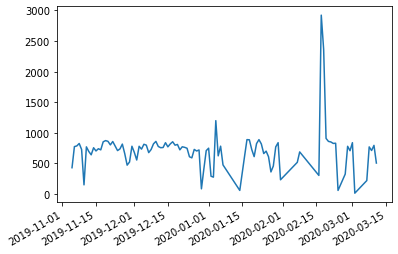

In [9]:
df.date.value_counts().plot();

In [10]:
df = df[df['date'] <= '2020-1-7']
len(df)

45104

In [72]:
df = df.sample(frac=1, random_state=303).drop_duplicates('search')

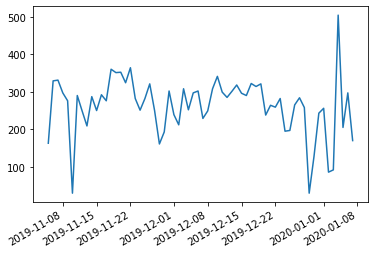

In [86]:
df.date.value_counts().plot();

In [75]:
df.to_csv('../data/input_files.csv', index=False)

In [20]:
import glob
import os
from multiprocessing import Pool
from tqdm import tqdm

In [76]:
def download_file(fn):
    fn_out = fn.replace(data_dir_in, data_dir_local)
    if os.path.exists(fn_out):
        return
    dir_name = os.path.dirname(fn_out)
    os.makedirs(dir_name, exist_ok=True)
    s3.wget(fn, fn_out)

In [77]:
files = df.fn.tolist()
files[:5]

['s3://markup-investigations-google/searches/google/iPhone-X/2019/11/21/Dmitry-Kozak/html/webpage_raw.html',
 's3://markup-investigations-google/searches/google/iPhone-X/2020/01/04/Dow-Jones-Industrial-Average/html/webpage_raw.html',
 's3://markup-investigations-google/searches/google/iPhone-X/2020/01/06/Accident/html/webpage_raw.html',
 's3://markup-investigations-google/searches/google/iPhone-X/2019/12/03/Rasmus-Dahlin/html/webpage_raw.html',
 's3://markup-investigations-google/searches/google/iPhone-X/2019/12/16/G2-Esports/html/webpage_raw.html']

In [78]:
data_dir_in = 's3://markup-investigations-google/searches/google/'
data_dir_local = '../data/input_v2/google_search/'

In [81]:
download_file(files[0])

In [85]:
n_processes = 12

data = []
with Pool(n_processes) as pool:
    for record in tqdm(pool.imap_unordered(download_file, files), 
                       total=len(files)):
        data.append(record)

# df = pd.DataFrame(data)

100%|██████████| 16808/16808 [07:37<00:00, 36.77it/s]


In [88]:
import shutil

In [91]:
fn_zip = shutil.make_archive(
    base_name = '../data/google-searches-iphone-11-19-to-2-7', 
    format = 'gztar', 
    root_dir = '../data/input/',
    verbose = True
)

In [89]:
shutil.make_archive?

Signature:
shutil.make_archive(
    base_name,
    format,
    root_dir=None,
    base_dir=None,
    verbose=0,
    dry_run=0,
    owner=None,
    group=None,
    logger=None,
)
Docstring:
Create an archive file (eg. zip or tar).

'base_name' is the name of the file to create, minus any format-specific
extension; 'format' is the archive format: one of "zip", "tar", "gztar",
"bztar", or "xztar".  Or any other registered format.

'root_dir' is a directory that will be the root directory of the
archive; ie. we typically chdir into 'root_dir' before creating the
archive.  'base_dir' is the directory where we start archiving from;
ie. 'base_dir' will be the common prefix of all files and
directories in the archive.  'root_dir' and 'base_dir' both default
to the current directory.  Returns the name of the archive file.

'owner' and 'group' are used when creating a tar archive. By default,
uses the current owner and group.
File:      ~/miniconda3/lib/python3.8/shutil.py
Type:      function


In [45]:
files = glob.glob('../data/input/google_searches/iPhone-X/20*/*/*/*/html/webpage_raw.html')
len(files)

16808

In [51]:
data = []
for fn in files:
    date = fn.split('../data/input/google_searches/iPhone-X/')[-1].split('/')
    year = date[0]
    month = date[1]
    day = date[2]
    search = date[3]
    
    row ={
        'fn' : fn,
        'date' : '-'.join([year, month, day]),
        'search' : search
    }
    
    data.append(row)

In [52]:
df_ = pd.DataFrame(data)

In [53]:
df_.date = pd.to_datetime(df_.date)

In [55]:
df_.date.value_counts().head(30)

2019-11-06    622
2019-11-07    589
2019-11-08    544
2019-11-05    431
2019-11-11    427
2019-11-19    421
2019-11-09    418
2019-11-18    401
2019-11-20    394
2019-11-14    393
2020-01-04    373
2019-11-12    371
2019-11-22    369
2019-11-16    362
2019-11-15    349
2019-11-21    342
2019-11-17    338
2019-12-03    306
2019-11-13    304
2019-11-23    300
2019-11-26    299
2019-11-25    292
2019-12-06    289
2019-12-10    285
2019-12-05    276
2019-12-11    266
2019-11-24    266
2019-12-13    264
2019-11-30    263
2019-12-17    254
Name: date, dtype: int64

In [11]:
fn_errors = '../data/intermediary/assay_errors.csv'
errors = pd.read_csv(fn_errors)

In [12]:
fn = errors.fn.iloc[0]

In [13]:
errors['search'] = errors.fn.apply(lambda x: x.split('/')[-3])

In [23]:
errors

,fn,error,search
0,../data/input/google_search/iPhone-X/2019/11/2...,"Warpped element, page is corrupt.",Croatia
1,../data/input/google_search/iPhone-X/2019/11/1...,"Warpped element, page is corrupt.",David-Bellavia
2,../data/input/google_search/iPhone-X/2019/12/1...,"Warpped element, page is corrupt.",Mindanao
3,../data/input/google_search/iPhone-X/2019/11/2...,"Warpped element, page is corrupt.",Superphone
4,../data/input/google_search/iPhone-X/2019/12/2...,"Warpped element, page is corrupt.",Bengali-language
...,...,...,...
3660,../data/input/google_search/iPhone-X/2019/11/0...,"Warpped element, page is corrupt.",Semen-Padang
3661,../data/input/google_search/iPhone-X/2019/11/0...,"Warpped element, page is corrupt.",Norwalk
3662,../data/input/google_search/iPhone-X/2019/11/0...,"Warpped element, page is corrupt.",Dallas
3663,../data/input/google_search/iPhone-X/2019/11/0...,"Warpped element, page is corrupt.",Uttar-Pradesh


In [14]:
salvages = df[df.search.isin(errors.search)]

In [15]:
results = salvages.search.value_counts()

In [16]:
files_rebooted = df[df.search.isin(results[results > 1].index)].fn

In [22]:
files_rebooted

15       s3://markup-investigations-google/searches/goo...
27       s3://markup-investigations-google/searches/goo...
31       s3://markup-investigations-google/searches/goo...
35       s3://markup-investigations-google/searches/goo...
37       s3://markup-investigations-google/searches/goo...
                               ...                        
45078    s3://markup-investigations-google/searches/goo...
45085    s3://markup-investigations-google/searches/goo...
45086    s3://markup-investigations-google/searches/goo...
45097    s3://markup-investigations-google/searches/goo...
45102    s3://markup-investigations-google/searches/goo...
Name: fn, Length: 4348, dtype: object

  0%|          | 272/72894 [00:19<33:31, 36.10it/s]

In [17]:
data_dir_in = 's3://markup-investigations-google/searches/google/'
data_dir_again = '../data/input/google_search_reboot/'

In [18]:
def download_file_again(fn):
    fn_out = fn.replace(data_dir_in, data_dir_again)
    if os.path.exists(fn_out):
        return
    dir_name = os.path.dirname(fn_out)
    os.makedirs(dir_name, exist_ok=True)
    s3.wget(fn, fn_out)

In [23]:
n_processes = 12

data = []
with Pool(n_processes) as pool:
    for record in tqdm(pool.imap_unordered(download_file_again, files_rebooted), 
                       total=len(files_rebooted)):
        data.append(record)


100%|██████████| 4348/4348 [02:03<00:00, 35.34it/s]
